# ConfusionMatrix, ROC, AUC, MAE, RMSE
##By Het Naik, CE18

###I have taken the example of symtomatic and asymtomatic patients, and their COVID19 results, and analysed the data accordingly 

In [ ]:
try:
    import pycm
except:
    !pip install -q pycm
    import pycm
from pycm import *
!pip install scikit-plot
from __future__ import absolute_import
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits as load_data
import scikitplot as skplt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error


## 1 Confusion Matrix
Description:


I have taken COVID19 testing example as it seems fairly relevant at this point of time, here we can visualize and analyze the data of the patients who were asymtomatic and still got Corona.

P.S. PyCM is a gem for this type of data visualization

In [ ]:
COVID19_TestResult = [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1] 
COVID19_Symtomatic = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0] 
ConMat = ConfusionMatrix(actual_vector=COVID19_TestResult, predict_vector=COVID19_Symtomatic) # Create CM From Data
print(ConMat)

Predict  0        1        
Actual
0        6        0        

1        4        14       





Overall Statistics : 

95% CI                                                            (0.68423,0.98244)
ACC Macro                                                         0.83333
ARI                                                               0.42211
AUNP                                                              0.88889
AUNU                                                              0.88889
Bangdiwala B                                                      0.74359
Bennett S                                                         0.66667
CBA                                                               0.68889
CSI                                                               0.68889
Chi-Squared                                                       11.2
Chi-Squared DF                                                    1
Conditional Entropy                                              

Symptomatic   0   1  All
Result                  
0             6   0    6
1             4  14   18
All          10  14   24


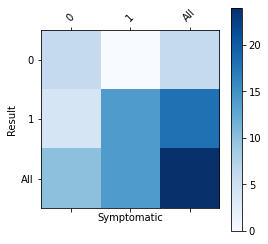

In [ ]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap='Blues') # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

COVID19_TestResult =  pd.Series([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],name='Result') 
COVID19_Symtomatic =  pd.Series([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0],name='Symtomatic') 
COVID19 = pd.crosstab(COVID19_TestResult, COVID19_Symtomatic, rownames=['Result'], colnames=['Symptomatic'], margins=True)
print(COVID19)
plot_confusion_matrix(COVID19)

## 2 ROC curve, AUC score
Description:

1 In the first example, I have used my own dataset as given in the above task.
The AUC score is around 87 which is not that bad.

2 In the second example, I have taken the load_digits datasets from sklearn

AUC SCORE : 0.8717948717948718


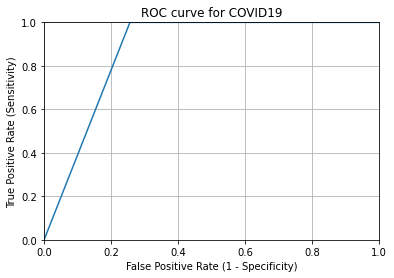

In [ ]:
COVID19_TestResult = [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,] 
COVID19_Symtomatic = [1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,]
fpr, tpr, thresholds = metrics.roc_curve(COVID19_Symtomatic,COVID19_TestResult)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for COVID19')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print("AUC SCORE :",metrics.roc_auc_score(COVID19_Symtomatic,COVID19_TestResult))

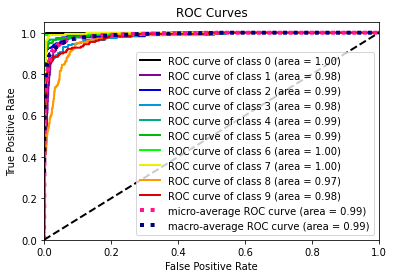

In [ ]:
X, y = load_data(return_X_y=True)
nb = GaussianNB()
nb.fit(X, y)
probas = nb.predict_proba(X)
skplt.metrics.plot_roc(y_true=y, y_probas=probas)
plt.show()
#print(metrics.roc_auc_score(y, probas))

## 3 Mean Absolute Error
Description:

Nothing much to discuss, just applied MAE to my dataset

In [ ]:
mean_absolute_error(COVID19_TestResult,COVID19_Symtomatic)

0.10416666666666667

## 4 Root Mean Squared Error
Description:

Nothing much to discuss, just applied RMSE to my dataset

In [ ]:
sqrt(mean_squared_error(COVID19_Symtomatic,COVID19_TestResult,squared=False)) # squared - True returns MSE value, False returns RMSE value

0.5681096832337497